# Project 5: Model Performance and Comparison

## Part A.1: Machine Learning Implementation
In this part, you will implement three classifical learning methods, as well as the train-test split and cross validation procedures. Note that **you are not allowed to use sklearn in this notebook**; you will receive a 0 for Part A if any sklearn package is present. Try to use Numpy vectorized operations whenever possible, otherwise your code will exceed the runtime threshold.

In [75]:
import seaborn as sns
import scipy.sparse as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from itertools import chain

In [76]:
# this cell has been tagged with excluded_from_script
# it will not be run by the autograder
%matplotlib inline

### Question 1: Linear Regression
Recall from the primer that linear regression assumes the following hypothesis function:
$$h_\theta(x) = b + \theta^T x.$$

With this hypothesis function, input data $X \in \mathbb{R}^{n \times d}$ and output data $Y \in \mathbb{R}^{n}$, linear regression attempts to minimize the loss function:
$$\mathcal{L}(\theta, b) = \frac{1}{2n} \left[ \sum_{i=1}^n \left(h_\theta(x^{(i)}) - y^{(i)} \right)^2   \right] + \frac{\lambda}{2n} \|\theta\|_2^2,$$
where $\theta \in \mathbb{R}^{d}$ is the weight, $b$ is the intercept term, and $\lambda \ge 0$ is the regularization parameter.

This optimization can be carried out by gradient descent. Given a learning rate $\alpha$, batch gradient descent for training linear regression consists of two steps:

1. Initialize $b = 0$ and $\theta$ as a vector of 0s.
1. Repeat `n_iters` times:

\begin{align}
    b & := b - \alpha \cdot \frac{1}{n} \sum_{i=1}^n \left(h_\theta(x^{(i)}) - y^{(i)} \right), \\
    \theta & := \theta - \alpha \cdot \frac{1}{n} \left[\sum_{i=1}^n \left(h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)} + \lambda \theta \right].
\end{align}
<hr>

Implement the class `LinearRegression` with 5 methods -- `__init__`, `loss`, `fit`, `get_params`, and `predict` -- to perform the above tasks. You can create instance variables as you see fit.

**Notes**:
* A `LinearRegression` instance may be created once and then trained on several datasets. Therefore, you should initialize $b$ and $\theta$ inside `.fit`, not in `__init__`.
* Do not use `np.linalg.norm` when computing $\|\theta\|_2^2$, as it may lead to slightly different outputs. Sum over all the squared elements of $\theta$ directly.

In [3]:
class LinearRegression:
    def __init__(self, lam):
        """
        Class constructor.
        
        args:
            lam (float) : the regularizer value
        """
        self.lam=lam
        self.b=None
        self.theta=None
        
    def loss(self, h, y):
        """
        Compute the average loss L(theta, b) based on the provided formula.
        
        args:
            h (np.array[n_samples]) : a vector of hypothesis function values on every input data point,
                this is the output of self.predict(X)
            y (np.array[n_samples]) : the output data vector
            
        return:
            float : the average loss value
        """
        n=h.shape[0]
       
        sum_1=np.sum(np.square(h-y))
       
        sum_1=sum_1
        l2_norm=(np.sum(np.square(self.theta)))*self.lam
     
        out =(sum_1+l2_norm)/(2*n)
      
        return out

        
    
    def fit(self, X, y, n_iters = 100, alpha = 0.01):
        """
        Train the model weights and intercept term using batch gradient descent.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
            y (np.array[n_samples]) : the output data vector

        kwargs:
            n_iters (int) : the number of iterations to train for
            alpha (float) : the learning rate
            
        return:
            List[float] : a list of length (n_iters + 1) that contains the loss value
                before training and after each training iteration
        """
        n,d= X.shape
        self.theta=np.zeros(d)
        self.b=0
        out=[]
        H=self.predict(X)
        loss=self.loss(H,y)
        out.append(loss)
        
        for i in range(n_iters):
           
            
            #update b
            temp=H-y
            self.b-=alpha*np.mean(temp)
            
            #update theta


            temp2=(np.sum(np.multiply(X,temp[:, np.newaxis]),axis=0)+self.lam*self.theta)/n
            self.theta-=alpha*temp2
            

            
            H=self.predict(X)
            loss=self.loss(H,y)
            out.append(loss)
            
        
        
        return out
    def get_params(self):
        """
        Get the model weights and intercept term.
        
        return:
            Tuple(theta, b):
                theta (np.array[n_dimensions]) : the weight vector
                b (float) : the intercept term
        """
        return (self.theta,self.b)
    
    def predict(self, X):
        """
        Predict the output vector given an input matrix
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
        
        return:
            np.array[n_samples] : a vector of hypothesis function values on every input data point
        """
        out=np.dot(X,self.theta)+self.b
      
        return out
    
# do not modify this function
def linear_regression(lam = 1e-4):
    return LinearRegression(lam)


In [4]:
def test_linear_regression():
    X = np.array([[0.9, 1.9], [1.95, 1.8], [1.85, 0.45], [1.3, 1.55], [1.9, 1.25]])
    y = np.array([-9.5, -6.8,  2.3, -5.9, -2.6])
    lr = linear_regression(lam = 1e-4)
    
    # before gradient descent
    losses = lr.fit(X, y, n_iters = 0)
    theta, b = lr.get_params()
    assert np.allclose(theta, [0, 0])
    assert b == 0
    assert np.allclose(losses[-1], 18.335)
    assert list(lr.predict(X)) == [0] * len(y)
    
    # gradient descent 1 iter
    losses = lr.fit(X, y, n_iters = 1)
    theta, b = lr.get_params()
    assert theta.shape == (X.shape[1], )
    assert np.allclose(theta, [-0.06033, -0.0833])
    assert np.allclose(b, -0.045)
    assert np.allclose(losses[-1], 17.10814680143814)
    assert np.allclose(lr.predict(X).round(6), np.array([
        -0.257567, -0.3125835, -0.1940955, -0.252544, -0.263752
    ]))
    
    # gradient descent 2 iters
    losses = lr.fit(X, y, n_iters = 2)
    theta, b = lr.get_params()
    assert theta.shape == (X.shape[1], )
    assert np.allclose(theta, [-0.11660027, -0.16287898])
    assert np.allclose(b, -0.087438916)
    
    assert np.allclose(losses[-1], 16.0080447832965)
    assert np.allclose(lr.predict(X).round(6), np.array([
       -0.5018492097016, -0.6079915917733, -0.3764449478234, -0.49148167470869997, -0.5125781417720999
    ]))
    
    # gradient descent 1000 iters
    losses = lr.fit(X, y, n_iters = 1000)
    theta, b = lr.get_params()
    assert theta.shape == (X.shape[1], )
    assert np.allclose(theta, [2.61161347, -6.14304403])
    assert np.allclose(b, -0.12902223174669367)
    assert np.allclose(losses[-1], 0.08234184423206654)
    assert np.allclose(lr.predict(X).round(6), np.array([
       -9.450353764235567, -6.0938552194255164, 1.9380928722090986, -6.255642966844243, -2.8457616771719003
    ]))
    print("All tests passed!")
    
test_linear_regression()

All tests passed!


### Question 2: Logistic Regression
Recall from the primer that logistic regression assumes the following hypothesis function:
$$h_\theta(x) = \sigma(b + \theta^T x)$$
where $\sigma(z) = (1+e^{-z})^{-1}$ is the sigmoid function.

With this hypothesis funtion, input data $X \in \mathbb{R}^{n \times d}$ and output labels $Y \in \{0,1\}^{n}$, logistic regression attempts to minimize the loss function
$$\mathcal{L}(\theta, b) = \frac{1}{2n} \left[{-\sum_{i=1}^{n}} y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right] + \frac{\lambda}{2n} \|\theta\|_2^2,$$
where $\theta \in \mathbb{R}^{d}$ is the weight, $b$ is the intercept, and $\lambda \ge 0$ is the regularization parameter.

This optimization can be carried out by gradient descent. Given a learning rate $\alpha$, batch gradient descent for training logistic regression consists of two steps:

1. Initialize $b = 0$ and $\theta$ as a vector of 0s.
1. Repeat `n_iters` times:

\begin{align}
    b & := b - \alpha \cdot  \frac{1}{2n} \sum_{i=1}^n \left(h_\theta(x^{(i)}) - y^{(i)} \right), \\
    \theta & := \theta - \alpha \cdot \frac{1}{2n} \cdot \left[\sum_{i=1}^n (h_\theta(x^{(i)}) - y^{(i)})x^{(i)} + 2\lambda \theta \right]
\end{align}

After training, we can predict the label for a new data point $x$ as
$$\hat y = \mathbb{1}\left(h_\theta(x) \ge \frac 1 2 \right) = \mathbb{1}(b + \theta^T x \ge 0).$$

<hr>

Implement the class `LRClassifier` with 6 methods -- `__init__`, `loss`, `fit`, `get_weights`, `decision_function` and `predict` -- to perform the above tasks. You can create instance variables as you see fit.

**Notes**:
* A `LRClassifier` instance may be created once and then trained on several datasets. Therefore, you should initialize $b$ and $\theta$ inside `.fit`, not in `__init__`.

In [199]:
def sig(x):
 
    return 1/(1+math.exp(-x))

# define vectorized sigmoid


class LRClassifier:
    def __init__(self, lam):
        
        
        self.lam=lam
    
    def loss(self, h, y):
       
        n=h.shape[0]
        ab=np.multiply(y,np.log(h))
        cd=np.multiply(1-y,np.log(1-h))
        sum_1=np.sum(ab+cd)
        l2_norm=(np.sum(np.square(self.theta)))*self.lam
        
        return (-sum_1+l2_norm)/(2*n)
    
    def fit(self, X, y, n_iters = 100, alpha = 1):
       
        n,d= X.shape
        self.theta=np.zeros(d)
        self.b=0
        out=[]
        H=self.decision_function(X)
        loss=self.loss(H,y)
        out.append(loss)
        n=len(H)
        for i in range(n_iters):
           
            temp=H-y
            
            #update b
            self.b-=(alpha/(2*n))*np.sum(temp)
           
            #update theta
            temp2=(alpha/(2*n))*(np.sum(np.multiply(X,temp[:, np.newaxis]),axis=0)+2*self.lam*self.theta)
            self.theta-=temp2
            

            
            H=self.decision_function(X)
            loss=self.loss(H,y)
            out.append(loss)
            

            #update return loss list
            
        
        return out 
    
    def get_params(self):
        """
        Get the model weights and intercept term.
        
        return:
            Tuple(theta, b):
                theta (np.array[n_dimensions]) : the weight vector
                b (float) : the intercept term
        """
        return (self.theta,self.b)

    
    def decision_function(self, X):
        """
        Compute the hypothesis function values on every input data point.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
        
        return:
            np.array[n_samples] : a vector of hypothesis function values on every input data point
        """
        
        H=(np.dot(X,self.theta)+self.b)
        out=1/(1+np.exp(-H))
        return out
        
    
    def predict(self, X):
        """
        Predict the label of every input data point.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
        
        return:
            np.array[n_samples] : a vector of predicted output labels for every input data point
        """
        vals=(self.decision_function(X)>=0.5).astype(int)
       
        return vals

        
    
def binary_lr_classifier(lam = 1e-4):
    return LRClassifier(lam)

In [200]:
def test_binary_lr_classifier():
    X = np.array([[-2, 4], [4, 1], [1, 6], [2, 4], [6, 2]])
    y = np.array([0, 0, 1, 1, 1])
    lr = binary_lr_classifier(lam = 1e-4)
    
    # before gradient descent
    losses = lr.fit(X, y, n_iters = 0)
    theta, b = lr.get_params()
    assert np.allclose(theta, [0, 0])
    assert b == 0
    assert np.allclose(losses[-1], 0.34657359027997264)
    assert np.allclose(lr.decision_function(X), [0.5] * 5)
    assert list(lr.predict(X)) == [1] * len(y)
    
    # 1st iteration
    losses = lr.fit(X, y, n_iters = 1)
    theta, b = lr.get_params()
    assert np.allclose(theta, [0.35, 0.35])
    assert b == 0.05
    assert np.allclose(losses[-1], 0.33351806318231178)
    assert np.allclose(lr.decision_function(X), [0.6791786991753931, 0.8581489350995123, 0.9241418199787566, 0.8956687768809987, 0.9453186827840592])
    assert list(lr.predict(X)) == [1] * len(y)
    
    # 2 iterations
    losses = lr.fit(X, y, n_iters = 2)
    theta, b = lr.get_params()
    assert np.allclose(theta, [0.20383002, 0.09069029])
    assert np.allclose(b, -0.080246)
    assert np.allclose(losses[-1], 0.28778446849618766)
    assert np.allclose(lr.decision_function(X), [0.4687546229122032, 0.6954586477733905, 0.6609937974719609, 0.6660059656189242, 0.7898655199585818])
    assert list(lr.predict(X)) == [0, 1, 1, 1, 1]
    
    # 1000 iterations
    losses = lr.fit(X, y, n_iters = 1000)
    theta, b = lr.get_params()
    assert np.allclose(theta, [1.62475335, 2.97699553])
    assert np.allclose(b, -12.016701793625622)
    assert np.allclose(losses[-1], 0.0178892651602277)
    assert np.allclose(lr.decision_function(X), [0.0336268115487116, 0.07305423924580728, 0.9994304104089492, 0.9585441655688948, 0.9755365947084815])
    assert list(lr.predict(X)) == [0, 0, 1, 1, 1]
    
    print("All tests passed!")

test_binary_lr_classifier()

All tests passed!


### Question 3: Multi-class Logistic Regression
To perform multi-class classification with logistic regression, we will use the one-versus-rest approach. In particular, our classifier can be defined as follows. Note that $h(x)$ now returns a vector, instead of a scalar value, for every input data point $x$.

1. **Input data**: $X \in \mathbb{R}^{n \times d}$
1. **Output labels**: $Y \in C^{n}$, where $C = \{1, 2, \ldots, k\}$ is the set of all class labels
1. **Parameters**: $\Theta$ is the matrix of all the weight vectors, and $\mathbf b$ is the vector of all the intercepts
$$\Theta =\left[\begin{array}{cccc}| & | & | & | \\
\theta_1 & \theta_2 & \cdots & \theta_k \\
| & | & | & |
\end{array}\right] \in \mathbb{R}^{d \times k}, \quad \mathbf b = \begin{pmatrix} b_1 \\ b_2 \\ \ldots \\ b_k \end{pmatrix} \in \mathbb{R}^k.$$
1. **Hypothesis function**:
$$
    h(x) = \frac{1}{\sum_{c \in C} \exp(b_c + \theta_c^T x)} \cdot
    \begin{pmatrix}
        \exp(b_1 + \theta_1^T x) \\
        \exp(b_2 + \theta_2^T x) \\
        \ldots \\
        \exp(b_k + \theta_k^T x) \\
    \end{pmatrix}
$$
1. **Loss function**: $$\mathcal L(\Theta, \mathbf b) = - \frac{1}{2n} \left[\sum_{i=1}^{n} \log h(x)_{y^{(i)}}\right] + \frac{\lambda}{2n} \sum_{c \in C}\|\theta_c\|_2^2,$$
where $h(x)_j$ denotes the $j$-th entry in the vector $h(x)$.

To train and use the classifier, we perform the following steps:
1. For each class $c \in C$:
    * Transform the label vector $Y$ to $Y_c$ where
        $$y_c^{(i)} = \begin{cases} 1 & \text{ if } y^{(i)} = c \\ 0 & \text{ if } y^{(i)} \ne c \end{cases}$$
    * Train a binary logistic regression classifier $(\theta_c, b_c)$ with `n_iters` iterations, based on input $X$ and output label $Y_c$. $(\theta_c, b_c)$ predicts whether a data point has label $c$ or not. You can assume all the binary classifiers share the same hyperparameters.
1. After training, we can predict the label for a new data point $x$ as
$$\hat y = \underset{c \in C}{\operatorname{argmax}} h(x)_c = \underset{c \in C}{\operatorname{argmax}} b_c + \theta_c^T x.$$

While $\Theta$ can also be derived by minimizing $\mathcal L(\Theta, b)$ through gradient descent, here we will only train the weight vectors $\theta_c$'s individually, following the one-versus-rest heuristic from above. We can still use $\mathcal L(\Theta, b)$ to evaluate the performance of our classifier on the training data after the training is done.

<hr>

Implement the class `MultiClassLRClassifier` with 6 methods -- `__init__`, `loss`, `fit`, `get_weights`, `decision_function` and `predict` -- to perform the above tasks. You can create instance variables as you see fit.

**Notes**:
* Same as before, remember to initialize $\Theta$ and $\mathbf b$ in `.fit`. However, `.fit` now **only needs to return the final loss value after training**, not the entire list of loss values by iteration.
* If there are $k$ classes in total, you can assume the class labels will be `[0, 1, ..., k-1]`.
* Remember to use the exp-normalize trick when computing $h(x)$.
* As an alternative way to compute $\mathcal L$, you can rewrite it as
$$\mathcal L(\Theta, \mathbf b) = - \frac{1}{2n} \left[\sum_{i=1}^{n}\sum_{j \in C} \mathbb{1}(j = y^{(i)}) \log h(x)_j \right] + \frac{\lambda}{2n} \sum_{c \in C}\|\theta_c\|_2^2,$$
which can be computed by turning $Y$ into a one-hot encoding matrix of size $n \times k$, following the thinking process in the K-means clustering section of the [Numpy primer](https://nbviewer.jupyter.org/url/clouddatascience.blob.core.windows.net/m20-foundation-data-science/p1-numpy-primer/numpy_primer.ipynb).

In [7]:
class MultiClassLRClassifier:
    def __init__(self, lam):
        """
        Class constructor.
        
        args:
            lam (float) : the regularizer value
        """
        self.lam=lam
      
    
    def loss(self, H, y):
        """
        Compute the average loss L(theta, b) based on the provided formula.
        
        args:
            H (np.array[n_samples, n_classes]) : the hypothesis matrix, where row i is h(X[i]),
                this is the output of self.decision_function(X)
            y (np.array[n_samples]) : the output label vector, containing labels from 0 to n_classes-1
            
        return:
            float : the average loss value
        """

        n=y.shape[0]
    
        out1=np.sum(np.log(H)[np.arange(n).tolist(),y.tolist()])
        
        out2=np.sum(np.square(self.theta))*self.lam
       
        return (-out1+out2)/(n*2)
    
    def fit(self, X, y, n_iters = 100, alpha = 1):
        """
        Independently train n_classes binary LR classifiers, each predicing whether a data point is in a particular class or not.
        Each classifier is trained by batch gradient descent.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
            y (np.array[n_samples]) : the output label vector, containing labels from 0 to n_classes-1
        
        kwargs:
            n_iters (int) : the number of iterations to train for
            alpha (float) : the learning rate
            
        return:
            float : the cross-entropy loss value on the entire training data after training
        """
        n,d=X.shape
        k=np.max(y)
       
        lr = binary_lr_classifier(lam=self.lam)
        self.b=np.zeros(k+1)
        self.theta=np.zeros((d,k+1))
        
        for i in range(k+1): 
            newy=(y==i).astype(int)
            lr.fit(X, newy, n_iters = n_iters)
            self.b[i]=lr.b
            self.theta[:,i]=lr.theta
        
        H=self.decision_function(X)
        loss=self.loss(H,y)
        return loss
       
            
    
    def get_params(self):
        """
        Get the model weight matrix and intercept vector.
        
        return:
            Tuple(Theta, B):
                Theta (np.array[n_dimensions, n_classes]) : the weight matrix,
                    where column j is the weight vector of the classifier that predicts whether a data point is in class j
                B (np.array[n_classes]) : the intercept vector,
                    where item j is the intercept of the classifier that predicts whether a data point is in class j
        """
        return (self.theta,self.b)
    
    def decision_function(self, X):
        """
        Compute the hypothesis function values on every input data point.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
        
        return:
            np.array[n_samples, n_classes] : the hypothesis matrix, where row i is h(X[i]),
                see the formula for h(x) in the writeup above.
        """
        mat=np.exp(np.dot(X,self.theta)+self.b)
    

        norm=1/np.sum(mat,axis=1)
        out=np.multiply(mat,norm[:,np.newaxis])
        return out
    
    def predict(self, X):
        """
        Predict the label of every input data point.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
        
        return:
            np.array[n_samples] : a vector of output labels for every input data point
        """
        H=self.decision_function(X)

        
        return np.argmax(H,axis=1)
    
# do not modify this function
def multiclass_lr_classifier(lam = 1e-4):
    return MultiClassLRClassifier(lam)

In [8]:
def test_multiclass_lr_classifier():
    X = np.array([
        [1, 6], [1, 7], [2, 5], [2, 8],
        [4, 2], [4, 3], [5, 1], [5, 2],
        [5, 3], [6, 1], [6, 2], [9, 4],
        [9, 7], [10, 5], [10, 6], [11, 6],
        [5, 9], [5, 10], [5, 11], [6, 9],
        [6, 10], [7, 10], [8, 11]
    ])
    y = np.array([
        0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3, 3
    ])
    multi_lr = multiclass_lr_classifier(lam = 1e-4)
    
    # before gradient descent
    final_loss = multi_lr.fit(X, y, n_iters = 0)
    thetas, bs = multi_lr.get_params()
    assert np.allclose(thetas, np.zeros((2, 4)))
    assert np.allclose(bs, np.zeros(4))
    assert np.allclose(final_loss, 0.6931471805599453)
    assert np.allclose(multi_lr.decision_function(X), np.full((len(y), 4), 0.25))
    assert list(multi_lr.predict(X)) == [0] * len(y)
 
    # gradient descent 1 iter
    final_loss = multi_lr.fit(X, y, n_iters = 1)
    thetas, bs = multi_lr.get_params()
    assert np.allclose(thetas, np.array(
        [[-1.3043478260869565, -0.6739130434782609, -0.3695652173913043, -0.5217391304347826],
         [-0.9347826086956521, -1.1956521739130435, -0.8913043478260869, 0.021739130434782608]]
    ))
    assert np.allclose(bs, [-0.16304347826086957, -0.09782608695652174, -0.14130434782608695, -0.09782608695652174])
    assert np.allclose(final_loss, 1.5948661586516544)
    assert np.allclose(multi_lr.decision_function(X), np.loadtxt("local_test_refs/multi_lr_decision_function_1.npy"))
    assert list(multi_lr.predict(X)) == [3] * len(y)
    
    # gradient descent 2 iter
    final_loss = multi_lr.fit(X, y, n_iters = 2)
    thetas, bs = multi_lr.get_params()
    assert np.allclose(thetas, np.array(
        [[-1.1741525763887666, 0.08405329650269378, 0.6749300069596299, 0.250023946810188],
         [-0.3698696640278152, -0.8923347376289046, -0.2904085511104315, 1.252575005389721]]
    ))
    assert np.allclose(bs, [-0.07616801209977848, 0.05374654543619424, -0.03683221319180832, 0.006708777994691106])
    assert np.allclose(final_loss, 2.4507247738274804)
    assert np.allclose(multi_lr.decision_function(X), np.loadtxt("local_test_refs/multi_lr_decision_function_2.npy"))
    assert list(multi_lr.predict(X)) == [3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
    
    # gradient descent 1000 iter
    final_loss = multi_lr.fit(X, y, n_iters = 1000)
    thetas, bs = multi_lr.get_params()
    assert np.allclose(thetas, np.array(
        [[-4.43691485302322, -0.15895242949854863, 1.8314459978612432, 0.11428400803141586],
         [1.4462434773266433, -2.243038284524103, -0.4123296983423064, 1.8358466248685217]]
    ))
    assert np.allclose(bs, [3.3982221320824473, 8.9389563873553, -12.268402031207522, -15.67416835171075])
    assert np.allclose(final_loss, 0.0020306591987543157)
    assert np.allclose(multi_lr.decision_function(X), np.loadtxt("local_test_refs/multi_lr_decision_function_1000.npy"))
    assert list(multi_lr.predict(X)) == list(y)
    
    print("All tests passed!")
    
test_multiclass_lr_classifier()

All tests passed!


We see that even though we only use the one-versus-rest heuristic and don't directly optimize for the cross-entropy loss, the final loss value after training for 1000 iterations is only 0.002, so one-versus-rest indeed works in this case.

### Question 4: Support Vector Machine
Recall from the primer that SVM assumes the following hypothesis function:
$$h_\theta(x) = b + \theta^T x.$$

With this hypothesis function, input data $X \in \mathbb{R}^{n \times d}$ and output labels $Y \in \{-1,1\}^{n}$, SVM attempts to minimize the loss function
$$\mathcal{L}(\theta) = \frac{1}{2n} \left[\sum_{i=1}^n \max \{ 1 - h_\theta(x^{(i)}) \cdot y^{(i)}, 0 \}\right] + \frac{\lambda}{2n} \|\theta\|_2^2,$$
where $\theta \in \mathbb{R}^{d}$ is the vector, $b$ is the intercept term, and $\lambda \ge 0$ is the regularization parameter.

This optimization can be carried out by gradient descent. Given a learning rate $\alpha$, batch gradient descent for training SVM consists of two steps:

1. Initialize $b = 0$ and $\theta$ as a vector of 0s.
1. Repeat `n_iters` times:

\begin{align}
    b & := b - \alpha \cdot  \frac{1}{2n} \sum_{i=1}^n -y^{(i)} \mathbb{1}\left(h(x^{(i)}) \cdot y^{(i)} \le 1 \right), \\
    \theta & := \theta - \alpha \cdot \frac{1}{2n} \cdot \left[\sum_{i=1}^n -x^{(i)} y^{(i)} \mathbb{1}\left(h(x^{(i)}) \cdot y^{(i)} \le 1 \right) + 2\lambda \theta \right].
\end{align}

After training, we can predict the label for a new data point $x$ as
$$\hat y = \begin{cases} 1 & \text { if } h_\theta(x) \ge 0 \\ -1 & \text{ if } h_\theta(x) < 0 \end{cases}$$
<hr>

Implement the class `SVMClassifier` with 6 methods -- `__init__`, `loss`, `fit`, `get_weights`, `decision_function` and `predict` -- to perform the above tasks. You can create instance variables as you see fit.

**Notes**:
* An `SVMClassifier` instance may be created once and then trained on several datasets. Therefore, you should initialize $b$ and $\theta$ inside `.fit`, not in `__init__`.

In [9]:
class SVMClassifier:
    def __init__(self, lam):
        self.lam=lam
    
    def loss(self, h, y):
        """
        Compute the average loss L(theta, b) based on the provided formula.
        
        args:
            h (np.array[n_samples]) : a vector of hypothesis function values on every input data point,
                this is the output of self.decision_function(X)
            y (np.array[n_samples]) : the output data vector
            
        return:
            float : the average loss value
        """
        n=y.shape[0]
        out1=np.sum((1-np.multiply(h,y)).clip(min=0))
        out2=np.sum(np.square(self.theta))*self.lam
       
        return (out1+out2)/(n*2)
       
    
    def fit(self, X, y, n_iters = 100, alpha = 1):
        """
        Train the model weights and intercept term using batch gradient descent.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
            y (np.array[n_samples]) : the output label vector, containing 0 and 1

        kwargs:
            n_iters (int) : the number of iterations to train for
            alpha (float) : the learning rate
            
        return:
            List[float] : a list of length (n_iters + 1) that contains the loss value
                before training and after each training iteration
        """
        n,d= X.shape
        self.theta=np.zeros(d)
        self.b=0
        out=[]
        H=self.decision_function(X)
        loss=self.loss(H,y)
        out.append(loss)
        
        for i in range(n_iters):
           
            #update b
            temp=np.multiply((np.multiply(H,y)<=1).astype(int),-y)

            temp_b=np.sum(temp)/(2*n)

            self.b-=alpha*temp_b
            
            #update theta


            temp2=(np.sum(np.multiply(X,temp[:, np.newaxis]),axis=0)+2*self.lam*self.theta)/(2*n)
            self.theta-=alpha*temp2
            

            
            H=self.decision_function(X)
            loss=self.loss(H,y)
            out.append(loss)
            
        
        
        return out
        
        
    
    def get_params(self):
        """
        Get the model weights and intercept term.
        
        return:
            Tuple(theta, b):
                theta (np.array[n_dimensions]) : the weight vector
                b (float) : the intercept term
        """
        return (self.theta,self.b)
    
    def decision_function(self, X):
        """
        Compute the hypothesis function values on every input data point.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
        
        return:
            np.array[n_samples] : a vector of hypothesis function values on every input data point
        """
        out=np.dot(X,self.theta)+self.b
        return out
    
    def predict(self, X):
        """
        Predict the label of every input data point.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
        
        return:
            np.array[n_samples] : a vector of predicted output labels for every input data point
        """
        
        H= self.decision_function(X)
        H[H>=0]=1
        H[H<0]=-1
        return H
        

    
def binary_svm_classifier(lam = 1e-4):
    return SVMClassifier(lam)

In [174]:
def test_binary_svm_classifier():
    X = np.array([[-2, 4], [4, 1], [1, 6], [2, 4], [6, 2]])
    y = np.array([-1, -1, 1, 1, 1])
    svm = binary_svm_classifier(lam = 1e-4)
    
    # before gradient descent
    losses = svm.fit(X, y, n_iters = 0)
    theta, b = svm.get_params()
    assert np.allclose(theta, [0, 0])
    assert b == 0
    assert np.allclose(losses[-1], 0.5)
    assert np.allclose(svm.decision_function(X), [0] * 5)
    assert list(svm.predict(X)) == [1] * len(y)
    
    # gradient descent 1 iter
    losses = svm.fit(X, y, n_iters = 1)
    theta, b = svm.get_params()
    assert theta.shape == (X.shape[1], )
    assert np.allclose(theta, [0.7, 0.7])
    assert np.allclose(b, 0.1)
    assert np.allclose(losses[-1], 0.7100098)
    assert np.allclose(svm.decision_function(X), [1.5, 3.6, 5, 4.3, 5.7])
    assert list(svm.predict(X)) == [1] * len(y)
    
    # gradient descent 2 iters
    losses = svm.fit(X, y, n_iters = 2)
    theta, b = svm.get_params()
    assert np.allclose(theta, [0.499986, 0.199986])
    assert np.allclose(b, -0.1)
    assert np.allclose(losses[-1], 0.3799930998040039)
    assert np.allclose(svm.decision_function(X), [-0.300028, 2.09993, 1.599902, 1.699916, 3.299888])
    assert list(svm.predict(X)) == [-1, 1, 1, 1, 1]
    
    # gradient descent 1000 iters
    losses = svm.fit(X, y, n_iters = 1000)
    theta, b = svm.get_params()
    assert np.allclose(theta, [0.58802283, 1.17683636])
    assert np.allclose(b, -4.8)
    assert np.allclose(losses[-1], 1.7307146603971552e-05)
    assert np.allclose(svm.decision_function(X), [-1.26870024, -1.27107231, 2.84904097, 1.08339109, 1.08180971])
    assert list(svm.predict(X)) == [-1, -1, 1, 1, 1]
    
    print("All tests passed!")
    
test_binary_svm_classifier()

All tests passed!


### Question 5: Multi-class SVM

To perform multi-class classification with support vector machine, we will use the one-versus-rest approach. In particular, our classifier can be defined as follows. Note that $h(x)$ now returns a vector, instead of a scalar value, for every input data point $x$.

1. **Input data**: $X \in \mathbb{R}^{n \times d}$
1. **Output labels**: $Y \in C^{n}$, where $C = \{1, 2, \ldots, k\}$ is the set of all class labels
1. **Parameters**: $\Theta$ is the matrix of all the weight vectors, and $\mathbf b$ is the vector of all the intercepts
$$\Theta =\left[\begin{array}{cccc}| & | & | & | \\
\theta_1 & \theta_2 & \cdots & \theta_k \\
| & | & | & |
\end{array}\right] \in \mathbb{R}^{d \times k}, \quad \mathbf b = \begin{pmatrix} b_1 \\ b_2 \\ \ldots \\ b_k \end{pmatrix} \in \mathbb{R}^k.$$
1. **Hypothesis function**:
$$
    h(x) = \begin{pmatrix}
        b_1 + \theta_1^T x \\
        b_2 + \theta_2^T x \\
        \ldots \\
        b_k + \theta_k^T x \\
    \end{pmatrix}
$$
1. **Loss function**: $$\mathcal L(\Theta, \mathbf{b}) = \frac{1}{2n} \left[\sum_{i=1}^n \sum_{c \in C,\ c \ne y^{(i)}} \max\{0, h(x^{(i)})_c - h(x^{(i)})_{y^{(i)}} + 1 \} \right] + \frac{\lambda}{2n} \sum_{c \in C} \|\theta_c\|_2^2,$$
where $h(x)_j$ denotes the $j$-th entry in the vector $h(x)$.

To train and use the classifier, we perform the following steps:
1. For each class $c \in C$:
    * Transform the label vector $Y$ to $Y_c$ where
        $$y_c^{(i)} = \begin{cases} 1 & \text{ if } y^{(i)} = c \\ -1 & \text{ if } y^{(i)} \ne c \end{cases}$$
    * Train a binary SVM classifier $(\theta_c, b_c)$ for `n_iters` iterations, based on input $X$ and output label $Y_c$. $(\theta_c, b_c)$ predicts whether a data point has label $c$ or not. You can assume all the binary classifiers share the same hyperparameters.
1. After training, we can predict the label for a new data point $x$ as
$$\hat y = \underset{c \in C}{\operatorname{argmax}} h(x)_c = \underset{c \in C}{\operatorname{argmax}} b_c + \theta_c^T x.$$

While $\Theta$ and $\mathbf b$ can also be derived by minimizing $\mathcal L(\Theta, 
\mathbf b)$ through gradient descent, here we will only train the $(\theta_c, b_c)$ individually, following the one-versus-rest heuristic from above. We can still use $\mathcal L(\Theta, \mathbf b)$ to evaluate the performance of our classifier on the training data after the training is done.

<hr>

Implement the class `MultiClassSVMClassifier` with 6 methods -- `__init__`, `loss`, `fit`, `get_weights`, `decision_function` and `predict` -- to perform the above tasks. You can create instance variables as you see fit.

**Notes**:
* Same as before, remember to initialize $\Theta$ and $\mathbf b$ in `.fit`. However, `.fit` now **only needs to return the final loss value** after training, not the entire list of loss values by iteration.
* If there are $k$ classes in total, you can assume the class labels will be `[0, 1, ..., k-1]`.
* Remember that the binarized labels here should be 1 and -1, not 1 and 0.

In [43]:
class MultiClassSVMClassifier:
    def __init__(self, lam):
       
        self.lam=lam
       
    
    def loss(self, H, y):
        """
        Compute the average loss L(theta, b) based on the provided formula.
        
        args:
            H (np.array[n_samples, n_classes]) : the hypothesis matrix, where row i is h(X[i]),
                this is the output of self.decision_function(X)
            y (np.array[n_samples]) : the output data vector
            
        return:
            float : the average loss value
        """
        n,c=H.shape
        new_y=H[np.arange(n).tolist(),y.tolist()]
      
        temp=H-new_y[:,np.newaxis]+1
  
        temp[np.arange(n).tolist(),y.tolist()]=0
       
        temp=temp.clip(min=0)
        front=np.sum(temp)
       
        back=np.sum(np.square(self.theta))*self.lam
        
        return (back+front)/(2*n)
        
    
    def fit(self, X, y, n_iters = 100, alpha = 1):
        """
        Independently train n_classes binary SVM classifier, each predicing whether a data point is in a particular class or not.
        Each classifier is trained by batch gradient descent.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
            y (np.array[n_samples]) : the output label vector, containing labels from 0 to n_classes-1
        
        kwargs:
            n_iters (int) : the number of iterations to train for
            alpha (float) : the learning rate
            
        return:
             float : the multinomial hinge loss value on the entire training data after training
        """
  
        
        n,d=X.shape
        k=np.max(y)
       
        model = SVMClassifier(lam=self.lam)
        self.b=np.zeros(k+1)
        self.theta=np.zeros((d,k+1))
        
        for i in range(k+1): 
            newy=(y==i).astype(int)
            newy[newy==0]=-1
            model.fit(X, newy, n_iters = n_iters)
            self.b[i]=model.b
            self.theta[:,i]=model.theta
        
        H=self.decision_function(X)
        loss=self.loss(H,y)
        return loss
        
    
    def get_params(self):
        """
        Get the model weight matrix and intercept vector.
        
        return:
            Tuple(Theta, B):
                Theta (np.array[n_dimensions, n_classes]) : the weight matrix,
                    where column j is the weight vector of the classifier that predicts whether a data point is in class j
                B (np.array[n_classes]) : the intercept vector,
                    where item j is the intercept of the classifier that predicts whether a data point is in class j
        """
        return (self.theta,self.b)
    
    def decision_function(self, X):
        """
        Compute the hypothesis function values on every input data point.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
        
        return:
            np.array[n_samples, n_classes] : the hypothesis matrix, where row i is h(X[i]),
                see the formula for h(x) in the writeup above.
        """
        out=np.dot(X,self.theta)+self.b
        return out
    
    def predict(self, X):
        """
        Predict the label of every input data point.
        
        args:
            X (np.array[n_samples, n_dimensions]) : the input data matrix
        
        return:
            np.array[n_samples] : a vector of predicted output labels for every input data point
        """
        H=self.decision_function(X)
        return np.argmax(H,axis=1)
    
# do not modify this function
def multiclass_svm_classifier(lam = 1e-4):
    return MultiClassSVMClassifier(lam)

In [46]:
def test_multiclass_svm_classifier():
    X = np.array([
        [1, 6], [1, 7], [2, 5], [2, 8],
        [4, 2], [4, 3], [5, 1], [5, 2],
        [5, 3], [6, 1], [6, 2], [9, 4],
        [9, 7], [10, 5], [10, 6], [11, 6],
        [5, 9], [5, 10], [5, 11], [6, 9],
        [6, 10], [7, 10], [8, 11]
    ])
    y = np.array([
        0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3, 3
    ])
    multi_svm = multiclass_svm_classifier(lam = 1e-4)
    
    # before gradient descent
    final_loss = multi_svm.fit(X, y, n_iters = 0)
    thetas, bs = multi_svm.get_params()
    assert np.allclose(thetas, np.zeros((2, 4)))
    assert np.allclose(bs, np.zeros(4))

    assert np.allclose(final_loss, 1.5)
    assert np.allclose(multi_svm.decision_function(X), np.full((len(y), 4), 0))
    assert list(multi_svm.predict(X)) == [0] * len(y)
    
    # gradient descent 1 iter
    final_loss = multi_svm.fit(X, y, n_iters = 1)
    thetas, bs = multi_svm.get_params()
    assert np.allclose(thetas, np.array(
        [[-2.60869565, -1.34782609, -0.73913043, -1.04347826],
         [-1.86956522, -2.39130435, -1.7826087,   0.04347826]]
    ))
    assert np.allclose(bs, [-0.32608696, -0.19565217, -0.2826087, -0.19565217])
    assert np.allclose(final_loss, 4.607799712336648)
    assert np.allclose(multi_svm.decision_function(X), np.loadtxt("local_test_refs/multi_svm_decision_function_1.npy"))
    assert list(multi_svm.predict(X)) == [3] * len(y)
    
    # gradient descent 2 iters
    final_loss = multi_svm.fit(X, y, n_iters = 2)
    thetas, bs = multi_svm.get_params()
    assert np.allclose(thetas, np.array(
        [[-2.478249527410208, -0.5869506616257089, 0.32609017013232533, -0.173908506616257],
         [-1.3043396975425332, -2.086946124763705, -1.1739052930056708, 1.282608506616257]]
    ))
    assert np.allclose(bs, [-0.2391304347826087, -0.043478260869565216, -0.17391304347826086, -0.08695652173913045])
    assert np.allclose(final_loss, 6.08933628122314)
    assert np.allclose(multi_svm.decision_function(X), np.loadtxt("local_test_refs/multi_svm_decision_function_2.npy"))
    assert list(multi_svm.predict(X)) == [3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
    
    # gradient descent 1000 iters
    final_loss = multi_svm.fit(X, y, n_iters = 1000)
    thetas, bs = multi_svm.get_params()
    assert np.allclose(thetas, np.array(
        [[-3.0304888496823272, -0.173522930862437, 1.8837726999313502, -0.1064134037200739],
         [1.1689677242800083, -1.5149193085489543, -0.5185826453689177, 2.3815731713004644]]
    ))
    assert np.allclose(bs, [1.260869565217392, 6.56521739130436, -12.260869565217392, -20.695652173913004])
    assert np.allclose(final_loss, 4.864387185921901e-05)
    assert np.allclose(multi_svm.decision_function(X), np.loadtxt("local_test_refs/multi_svm_decision_function_1000.npy"))
    assert list(multi_svm.predict(X)) == list(y)
    print("All tests passed!")
    
    
test_multiclass_svm_classifier()

All tests passed!


We see that the loss value actually *increases* during the first few iterations, because we are not directly optimizing for the hinge loss function. However, starting from the 3rd iteration it will start to decrease, and reaches $4.8 \times 10^{-5}$ after 1000 iterations. Therefore, the one-versus-rest heuristic also works in this case.

## Part A.2: Data splitting and normalization
We will now cover some data processing tasks before running our machine learning models. These include: train-validate split, k-fold split and data normalization.

### Question 6: Train-validate split
Implement the function `train_validate_split` that takes as input a numpy array `X`, a fraction `train_portion`, and a random generator seed. This function then returns `floor(len(X) * train_portion)` row indexes sampled randomly from the input `X` as the training indexes, and the remaining rows as the validation indexes.

**Notes**:
* You should first get a random permutation `P` of the list `[0, 1, ..., len(X) - 1]` using `np.random.permutation` and the given seed. Then take the first `floor(len(X) * train_portion)` indexes in this permutation as the training indexes, and the remaining as the validation indexes.

In [62]:
def train_validate_split(X, train_portion, seed = 0):
    """
    Geting the training and validation row indexes from a given input data matrix
    
    args:
        X (np.array[n_samples, n_dimensions]) : the input data matrix
        train_portion (float) : the portion of rows in X used for training, from 0 to 1
    
    kwargs:
        seed (int) : the random generator seed
        
    return:
        Tuple(training_indexes, validation_indexes):
            training_indexes (List[int]) : a list of row indexes in the training set
            validation_indexes (List[int]) : a list of row indexes in the validation set
    """
    n=len(X)
    index=np.random.RandomState(seed=seed).permutation(n)
    front=math.floor(len(X) * train_portion)
   
    return index[:front].tolist(),index[front:].tolist()

In [64]:
def test_train_validate_split():
    X = np.zeros((1728, 10))
    train_indexes, test_indexes = train_validate_split(X, 0.9, 0)
    assert len(train_indexes) == 1555
    assert len(test_indexes) == 173
    
    assert train_indexes[:10] == [1318, 124, 648, 249, 1599, 1643, 783, 1364, 1228, 985]
    assert train_indexes[-10:] == [139, 749, 1284, 1004, 323, 180, 1272, 450, 1434, 607]
    assert test_indexes[:10] == [1043, 1352, 296, 1293, 1250, 94, 1539, 1613, 637, 1304]
    assert test_indexes[-10:] == [599, 277, 1033, 1383, 763, 835, 1216, 1653, 559, 684]
    print("All tests passed!")
    
test_train_validate_split()

All tests passed!


### Question 7: K-fold split
Implement the function `kfold_split` that takes as input a numpy array `X`, a positive integer `k`, and a random seed. This function splits the row indexes of `X` into `k` folds and returns a list of `k` tuples, where each tuple contains (1) a list of indices used in the training folds, and (2) a list of indices used in the validation fold. Here are the steps for doing so:

1. Get a random permutation `P` of the list `[0, 1, ..., len(X) - 1]` using `np.random.permutation` and the given seed. Then partition `P` into `k` consecutive segments, where the first `len(P) % k` segments each have size `len(P)//k + 1`, and the remaining segments each have size `len(P)//k`.
1. Once you have `k` folds, return a list of `k` tuples where the `i`-th tuple uses fold `i` as the validation fold and the rest as training fold. The indexes in each fold should appear in the same order as they appear in `P`.

As an example, let's say `X` has 10 rows and `k = 3`. We first get a random permutation of the row indexes of `X`: `P = [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]`.
* `P` is now divided into 3 folds: `folds = [[2, 8, 4, 9], [1, 6, 7], [3, 0, 5]]`.
* We use `folds[0]` as validation indexes, and the others as train indexes:

`validation_indexes_0 = [2, 8, 4, 9]`, `train_indexes_0 = [1, 6, 7, 3, 0, 5]`.
* We use `folds[1]` as validation indexes, and the others as train indexes:

`validation_indexes_1 = [1, 6, 7]`, `train_indexes_1 = [2, 8, 4, 9, 3, 0, 5]`.
* We use `folds[2]` as validation indexes, and the others as train indexes:

`validation_indexes_2 = [3, 0, 5]`, `train_indexes_2 = [2, 8, 4, 9, 1, 6, 7]`.

Finally, the output will be a list of 3 tuples: `[(train_indexes_0, validation_indexes_0), (train_indexes_1, validation_indexes_1), (train_indexes_2, validation_indexes_2)]`.

In [86]:
def kfold_split(X, k, seed = 0):
    """
    Perform k-fold split on an input data matrix
    
    args:
        X (np.array[n_samples, n_dimensions]) : the input data matrix
        k (int) : the number of folds
    
    kwargs:
        seed (int) : the random generator seed
        
    return:
        List[Tuple(train_indexes, val_indexes)]: a list of k tuples of (train_indexes, val_indexes)
            train_indexes (List[int]) : a list of row indexes in the training set
            val_indexes (List[int]) : a list of row indexes in the validation set    
    """
    n=len(X)
    width=n//k
    remain=n%k
    
    P=np.random.RandomState(seed=seed).permutation(n)
    bar=remain*(width+1)
    front=P[:bar].reshape(remain,width+1).tolist()

    back=P[bar:].reshape((k-remain),width).tolist()
    to=front+back
    out=[]
   
    for i in range(k):
        
        train=to[i]
        to1=to.copy()
        to1.pop(i)
        
        valid=list(chain.from_iterable(to1))
        out.append((valid,train))
        
  
    return out 

In [87]:
def test_kfold_split():
    kfolds = kfold_split(np.ones((10, 3)), 3, 0)
    assert len(kfolds) == 3
    # training indexes

    assert [fold[0] for fold in kfolds] == [
        [1, 6, 7, 3, 0, 5],
        [2, 8, 4, 9, 3, 0, 5],
        [2, 8, 4, 9, 1, 6, 7]
    ]
    # validation indexes
    assert [fold[1] for fold in kfolds] == [
        [2, 8, 4, 9],
        [1, 6, 7],
        [3, 0, 5]
    ]
    
    kfolds = kfold_split(np.ones((1728, 5)), 10, 0)
    # training indexes -- fold size distribution
    assert [len(fold[0]) for fold in kfolds] == [1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1556, 1556]
    # training indexes -- first index in each fold
    assert [fold[0][0] for fold in kfolds] == [529, 1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318, 1318]
    # validation indexes - fold size distribution
    assert [len(fold[1]) for fold in kfolds] == [173, 173, 173, 173, 173, 173, 173, 173, 172, 172]
    # validation indexes -- first index in each fold
    assert [fold[1][0] for fold in kfolds] == [1318, 529, 1649, 580, 505, 1303, 1398, 375, 1389, 1352]
    print("All tests passed!")

test_kfold_split()

All tests passed!


### Question 8: Data normalization
Let's now normalize the dataset to prepare for running our models. The normalization method we will pick is to transform each data column to have zero mean and unit variance. Implement the function `normalize_data` which, given the input training data $T$ and validation data $V$, return the normalized data $\tilde T$ and $\tilde V$ such that

$$\tilde{T}_{i,j} = \frac{T_{i,j} - \mu_j}{\sigma_j}, \quad \tilde{V}_{i,j} = \frac{V_{i,j} - \mu_j}{\sigma_j},$$

where $\mu_j$ and $\sigma_j$ are the mean and standard deviation of column $j$ in $T$:

$$\mu_j = \frac{1}{n} \sum_{i=1}^n T_{i,j}, \quad \sigma_j  = \sqrt{\frac{1}{n} \sum_{i=1}^n (T_{i,j} - \mu_j)^2}.$$

Note that we use the same $\mu_j$ and $\sigma_j$ derived from $T$ for both $T$ and $V$. In general, we should complete all feature normalization based on the training data alone, and then afterwards apply this same normalization to the validation data.

In [186]:
def normalize_data(T, V = None):
    """
    Normalize the training data to get zero mean and unit variance in each column.
    Perform the same normalization on the validation / testing data, if provided.
    
    args:
        T (np.array) : the training data matrix
    
    kwargs:
        V (np.array) : the validation / testing data matrix, can be None
        
    return:
        Tuple(T_norm, V_norm):
            T_norm (np.array) : the normalized training data matrix
            V_norm (np.array) : the normalized testing data matrix, or None if V is None
    """
    
    T_m=np.mean(T,axis=0)
    
    #T_s=np.std(T,axis=0)
    T_s=np.sqrt(np.mean(np.square(T-T_m),axis=0))

    T=(T-T_m)/T_s
    V_out=None
    
    if type(V)==np.ndarray:
       
        V_out=(V-T_m)/T_s
    
    
    return (T,V_out)

In [198]:
def test_normalize_data():
    X_train = np.array([[1, 5, 9], [10, 3, 4], [6, 2, 1]])
    X_val = np.array([[2, 7, 8], [16, 9, 5], [0, 6, 3]])
    X_train_norm, X_val_norm = normalize_data(X_train, X_val)
    assert np.allclose(X_train_norm, 
        [[-1.26750044,  1.33630621,  1.31319831],
        [ 1.1769647 , -0.26726124, -0.20203051],
        [ 0.09053575, -1.06904497, -1.1111678 ]]
    )
    assert np.allclose(X_val_norm,
        [[-0.99589321,  2.93987366,  1.01015254],
        [ 2.80660813,  4.54344111,  0.10101525],
        [-1.53910768,  2.13808994, -0.50507627]]
    )
    
    X_train_norm, X_val_norm = normalize_data(X_train)
    assert X_val_norm is None
    print("All tests passed!")
    
test_normalize_data()

[[-1.26750044  1.33630621  1.31319831]
 [ 1.1769647  -0.26726124 -0.20203051]
 [ 0.09053575 -1.06904497 -1.1111678 ]]
All tests passed!


## Part A.3: Putting it all together
Let's now see how our models perform on a classical dataset: the [UCI wine quality data](https://archive.ics.uci.edu/ml/datasets/wine). You can read more in the linked page, but at a high level, the dataset has the following variables:

**Input variables**:
1. fixed acidity : most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
1. volatile acidity : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
1. citric acid : found in small quantities, citric acid can add 'freshness' and flavor to wines.
1. residual suga : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
1. chlorides : the amount of salt in the wine.
free sulfur dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
1. total sulfur dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
1. density : the density of water is close to that of water depending on the percent alcohol and sugar content.
1. pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
1. sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
1. alcohol : the percent alcohol content of the wine.

**Output variables**:
1. *quality*: a score between 0 and 10 given by human wine testers.

We begin by loading the dataset and doing some quick exploratory analyses.

In [115]:
df_wine = pd.read_csv("winequality.csv", sep = ";")
df_features = df_wine.drop(columns = ["quality"])
X_wine, y_wine = df_features.to_numpy(), df_wine["quality"].to_numpy()

In [116]:
# this cell has been tagged with excluded_from_script
# it will be ignored by the autograder
display(df_wine.head())
df_wine.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Let's see the distribution of each input feature in the dataset.

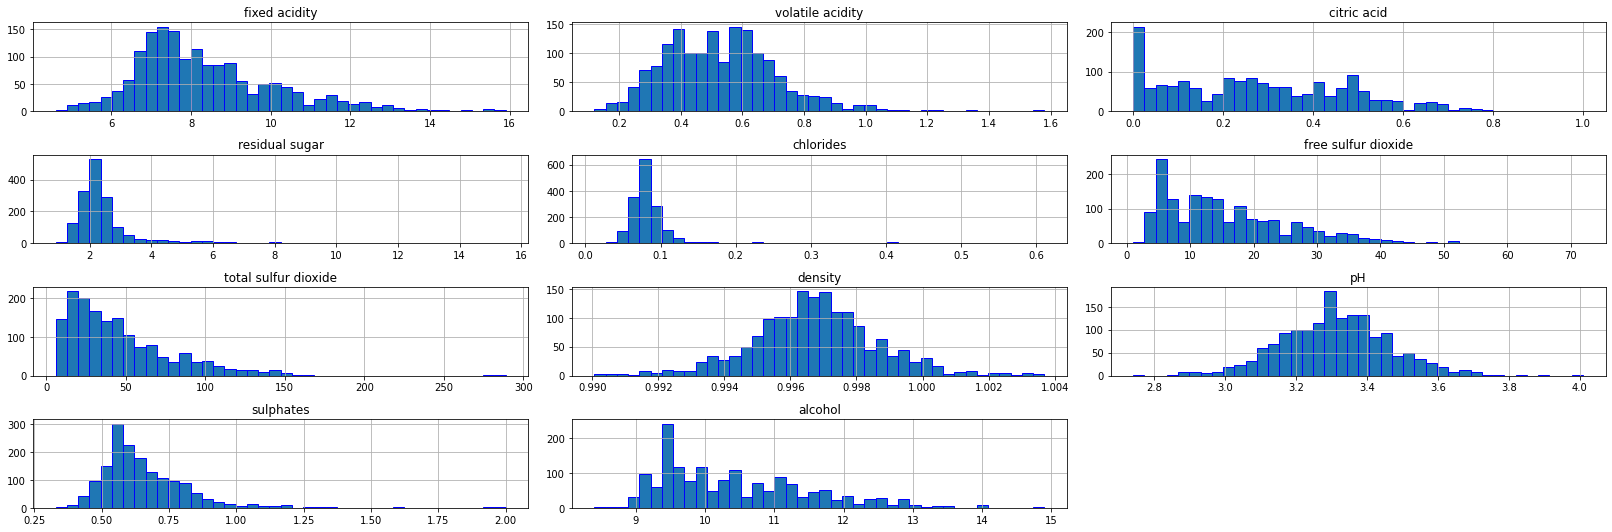

In [117]:
# this cell has been tagged with excluded_from_script
# it will be ignored by the autograder
df_features.hist(bins = 40, edgecolor = "b", figsize = (15, 5), xlabelsize = 10, ylabelsize = 10)
plt.tight_layout(rect = (0, 0, 1.5, 1.5))

A quick observation is that the input variables are not on the same scale; for example, `alcohol` ranges from 0 to above 200, while `chlorides` can get up to 600. Recall from the primer that in this situation, we would need to normalize all the input feature columns before carrying out gradient descent.

Now let's see the distribution of the output variable:

<AxesSubplot:>

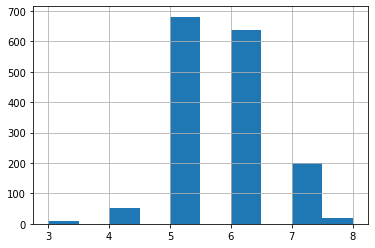

In [118]:
# this cell has been tagged with excluded_from_script
# it will be ignored by the autograder
df_wine["quality"].hist()

We see that, despite the dataset description stating that `quality` can be from 0 to 10, this particular dataset only contains quality values from 3 to 8. Furthermore, there is a clear class imbalance, with the majority of quality scores being 5 or 6.

Let's also look at the correlation matrix between each pair of variables:

<AxesSubplot:>

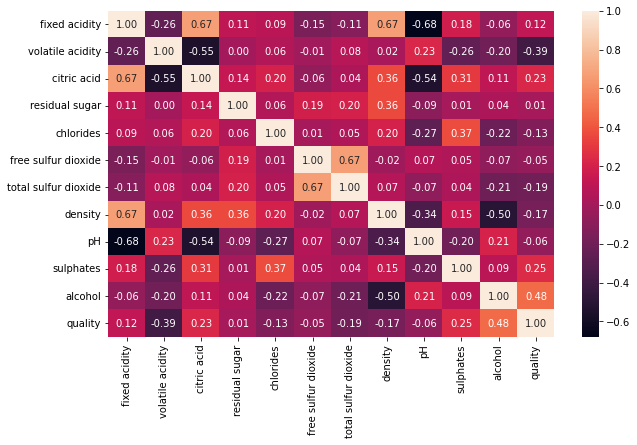

In [119]:
# this cell has been tagged with excluded_from_script
# it will be ignored by the autograder
corr = df_wine.corr()
f, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(round(corr, 2), annot = True, ax = ax, fmt = ".2f")

The bottom row (or rightmost column) in this matrix shows the correlation between each input variable and the output quality. We see that `alcohol` has a fairly high correlation with the quality ($\rho = 0.48$), compared to the other input features.

### Question 9: Predicting wine quality with linear regression
Let's now run a linear regression model to predict wine quality based on the provided input features. Implement the function `linear_regression_wine_quality` that performs the following steps:
1. Do a single train-validate split with the given seed on the input data `X` and output data `y`, yielding `X_train, y_train, X_val, y_val`.
1. Normalize `X_train` and `X_val` by inputting both into `normalize_data`.
1. Train a linear regression model with the given hyperparameters on the training data `X_train, y_train`, yielding the list of training loss per iteration.
1. Use the trained model to predict the output data based on `X_val`, and evaluate its mean squared error with respect to the ground truth `y_val`:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (h(x^{(i)}) - y^{(i)})^2.$$

Note that we are evaluating error on the validation data, so there is no $\lambda \|\theta\|_2^2$ term in the error.

In [137]:
def linear_regression_wine_quality(X, y, train_portion = 0.8, seed = 0, n_iters = 1000, lam = 1e-4, alpha = 0.01):
    """
    Train and evaluate a linear regression model for predicting wine quality, based on a single train-validate split.
    
    args:
        X (np.array[n_samples, n_dimensions]) : the input feature data
        y (np.array[n_sampels]) : the output data vector
        
    kwargs:
        train_portion (float) : the portion of rows in X used for training, from 0 to 1
        seed (int) : the random generator seed
        n_iters (int) : the number of training iterations
        lam (float) : the regularizer value
        alpha (float) : the learning rate
    
    return:
        Tuple(training_losses, validation_loss):
            training_losses (List[float]) : a list of length (n_iters + 1) that contains
                the loss value before training and after each training iteration
            validation_loss (float) : the mean squared error between the
                predicted and ground truth quality data in the validation set
    """
    train_id,test_id=train_validate_split(X, train_portion=train_portion, seed = seed)
 

    X_tr=X[train_id,:]
    X_te=X[test_id,:]
    y_tr=y[train_id]
    y_te=y[test_id]
    
    X_tr,X_te=normalize_data(X_tr,X_te)
    
    lr = linear_regression(lam = lam)
    
    # before gradient descent
    losses = lr.fit(X_tr, y_tr, n_iters =  n_iters, alpha = alpha)
    H=lr.predict(X_te)
    mse=np.mean(np.square(H-y_te))
    return losses,mse

[5 5 5 ... 6 5 6]
All tests passed!


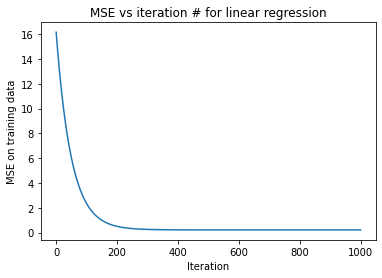

In [131]:
def test_linear_regression_wine_quality():
    training_losses, validation_loss = linear_regression_wine_quality(X_wine, y_wine)
    assert np.allclose(training_losses[:10],[
        16.16340891321345, 15.844654398973274, 15.532296071529554, 15.226204605715468, 14.926253333115701,
        14.632318185538022, 14.344277639784428, 14.062012663686984, 13.785406663374745, 13.514345431739175
    ])
    assert np.allclose(training_losses[-10:], [
        0.21468696921929892, 0.2146866822438799, 0.21468639607119974, 0.21468611069787508, 0.21468582612054368,
        0.21468554233586465, 0.21468525934051777, 0.21468497713120357, 0.21468469570464296, 0.21468441505757732
    ])
    assert np.allclose(validation_loss, 0.37078193362267553)
    print("All tests passed!")
    
    plt.plot(np.arange(len(training_losses)), training_losses)
    plt.title("MSE vs iteration # for linear regression")
    plt.xlabel("Iteration")
    plt.ylabel("MSE on training data")

test_linear_regression_wine_quality()

By plotting the list of training losses, we see that the MSE starts at around 16 but quickly drops down, and reaches close to 0 at around 200 iterations. On the other hand, the validation loss can likely be optimized further. It's also important to note that this validation loss may change if we use a different seed; as mentioned in the primer, this is one weakness of train-validate split, since we are at the mercy of the random split.

While we can tune the hyperparameters (in this case $\alpha, \lambda$ and # of iterations) to improve this performance, let's take a step back and revisit the dataset. We note that the output column only contains integer values from 3 to 8, which seems a bit too constrained for linear regression (in fact, our problem is an instance of [ordinal regression](https://en.wikipedia.org/wiki/Ordinal_regression)). On the other hand, one may argue that predicting the exact wine rating is not necessary; we only need to know whether a wine with certain attributes is *good* or *bad*.

For our purpose, let's define *bad* (coded as class 0) as having a quality score of at most 5, and *good* (coded as class 1) as having a quality score greater than 5. We now have a binary classification problem instead of a regression one:

In [132]:
y_wine_binarized_lr = np.where(y_wine > 5, 1, 0)
y_wine_binarized_svm = np.where(y_wine > 5, 1, -1)

Let's see how many instances of each class we end up with:

In [133]:
# this cell has been tagged with excluded_from_script
# it will be ignored by the autograder
np.unique(y_wine_binarized_lr, return_counts = True)

(array([0, 1]), array([744, 855]))

We see that the two classes are fairly balanced, with 744 instances of class 0 (bad wine) and 855 instances of class 1 (good wine).

### Question 10: Classifying wine quality

Let's now run our binary classifiers on this dataset. We will perform both model training and hyperparameter tuning together, using a train-test split followed by cross validation (see Section 4.2.3 of the primer for more details). Implement the function `classify_wine_quality` that performs the following steps:

1. Split the input data and labels into a training set and a testing set, based on the provided `train_portion` and `seed`.
1. Perform a k-fold split of the training set based on the provided `k` and `seed`.
1. Loop through all possible pairs of $(\alpha, \lambda)$ and identify the pair $(\alpha^*, \lambda^*)$ that yields the best cross-validated accuracy on the validation folds (this is the mean of the `k` accuracy values when evaluating the trained models on the `k` validation folds). The particular classifier to use (logistic regression or SVM) is provided as a parameter. The lists of candidate $\alpha$ and $\lambda$ values to select from are also provided as parameters.
1. Train a classifier model on the entire training set, with $(\alpha^*, \lambda^*)$ as the hyperparameters. Compute the accuracy of this model on the test set; this is the unbiased estimator of our model's generalization performance.
1. Train a classifier model on the entire dataset, with $(\alpha^*, \lambda^*)$ as the hyperparameters, and return the trained model. This is the "deployment model" that we can use to predict unseen data.

**Notes**:
* The parameter `clf_builder` is a function, which is either `binary_lr_classifier` or `binary_svm_classifier`, which we implemented earlier. To create an instance of the classifier, you can call `clf_builder(lam)`, with an input `lam` value.
* Remember to normalize the training and validation / testing data before calling `.fit`.
* When evaluating a trained model on the validation or testing data, we will use accuracy as our metric. In particular, let $\hat y \in \{0,1\}^n$ be the vector of predicted labels (output from the `.predict` method) and $y \in \{0,1\}^n$ be the ground truth label in the validation or test set, the accuracy is defined as
$$\text{Acc} = \frac{1}{n} \sum_{i=1}^n \mathbb{1}(y^{(i)} = \hat y^{(i)}).$$

* If multiple pairs of $(\alpha, \lambda)$ yield the same (best) cross-validated accuracy, pick the one with the smaller $\alpha$; if the $\alpha$'s are the same, pick the one with the smaller $\lambda$.
* Typically for classification problems, we would use stratified split instead of random split, to ensure that the train and test sets have the same percentage of class labels. For simplicity, we will only use the random split that you implemented in `train_validate_split` and `kfold_split` here.
* Make sure that you only normalize the data right before calling `.fit`, as you need to keep the validation data completely separate from the training data

In [208]:
def classify_wine_quality(X, y, clf_builder, train_portion, k, alpha_candidates, lambda_candidates, n_iters = 100, seed = 0):
    """
    Train a binary classifier model with hyperparameter tuning.
    
    args:
        X (np.array[n_samples, n_dimensions]) : the input feature data
        y (np.array[n_samples, dtype = np.int64]) : the output data vector
        clf_builder (function) : either binary_lr_classifier or binary_svm_classifier
        train_portion (float) : the portion of rows in X used for training, from 0 to 1
        k (int) : the number of folds in k-fold cross validation
        alpha_candidates (List[float]) : a list of candidate alpha values to consider
        lambda_candidates (List[float]) : a list of candidate lambda values to consider
    
    kwargs:
        n_iters (int) : the number of training iterations for all calls to .fit
        seed (int) : the random generator seed
    
    return:
        Tuple(best_alpha, best_lam, unbiased_acc, clf):
            best_alpha (float) : the alpha value in the best hyperparameter setting
            best_lam (float) : the lambda value in the best hyperparameter setting
            unbiased_acc (float) : the accuracy when a classifier trained with the best hyperparams
                on the entire training set is evaluated on the test set
            clf (LRClassifier or SVMClassifier) : the fitted model after training on
                the whole dataset with the best hyperparams
    """
    train_id,test_id=train_validate_split(X, train_portion=train_portion, seed = seed)
    X_X=X.copy()
    y_y=y.copy()
    X_train=X[train_id,:]
    X_test=X[test_id,:]
    y_train=y[train_id]
    y_test=y[test_id]
    kfold=kfold_split(X_train, k, seed = seed)
    
    best_mean=None
    champ=None
    lambda_candidates.sort()
    alpha_candidates.sort()
    
    lambda_candidates=lambda_candidates[::-1]
    alpha_candidates=alpha_candidates[::-1]
    
    
    for lam in lambda_candidates:
        lr=clf_builder(lam)
        for alpha in  alpha_candidates:
            acc_mean=0
            dvi=0
            for (train_id,valid_id) in kfold:
                X_tr=X_train[train_id,:]
                X_valid=X_train[valid_id,:]
                y_tr=y_train[train_id]
                y_valid=y_train[valid_id]
                
                X_tr,X_valid=normalize_data(X_tr,X_valid)
                losses = lr.fit(X_tr, y_tr, n_iters =  n_iters, alpha = alpha)
                H=lr.predict(X_valid)
                
                
                avg=np.mean((H==y_valid).astype(int))
                

                acc_mean+=avg
                dvi+=1
            acc_mean/=dvi
            if best_mean==None or acc_mean>=best_mean:
                champ=(lam,alpha)
                best_mean=acc_mean
   
    lam,alpha=champ
    lr=clf_builder(lam)  
    X_train,X_test=normalize_data(X_train,X_test)
    losses = lr.fit(X_train, y_train, n_iters =  n_iters, alpha = alpha)
    H=lr.predict(X_test)
    avg=np.mean((H==y_test).astype(int))
    X_X,_=normalize_data(X_X)
    losses = lr.fit(X_X, y_y, n_iters =  n_iters, alpha = alpha)
    
    return(alpha,lam,avg,lr)


In [209]:
def test_classify_wine_quality():
    alpha_candidates, lambda_candidates = [0.01, 0.1, 0, 1, 5], [1e-4, 1e-2, 0, 1, 5]
    
    # logistic regression
    best_alpha, best_lam, unbiased_acc, fitted_lr = classify_wine_quality(
        X_wine, y_wine_binarized_lr, binary_lr_classifier, 0.8, 5,
        alpha_candidates, lambda_candidates
    )
    theta, b = fitted_lr.get_params()
    assert unbiased_acc == 0.734375
    assert best_alpha == 1
    assert best_lam == 1

    assert np.allclose(theta, [
        0.24270378, -0.54275055, -0.18055221,  0.09088647,
        -0.19596458, 0.21928214, -0.53114866, -0.14740723,
        -0.03296759,  0.47671029, 0.86840286
    ])
    print(b)
    assert np.allclose(b, 0.2397675985245648)
    
    # support vector machine
    best_alpha, best_lam, unbiased_acc, fitted_svm = classify_wine_quality(
        X_wine, y_wine_binarized_svm, binary_svm_classifier, 0.8, 5,
        alpha_candidates, lambda_candidates
    )
    theta, b = fitted_svm.get_params()
    print(theta)
    assert unbiased_acc == 0.728125
    assert best_alpha == 1
    assert best_lam == 0
    assert np.allclose(theta,[
        0.25536217, -0.48357185, -0.26178835,  0.09742388, -0.13234648,
        0.15076227, -0.34814773, -0.06226067, -0.0448899 ,  0.3600738 ,
        0.88433428
    ])
    print(b)
    assert np.allclose(b, 0.13664790494058782)
    print("All tests passed!")
    
test_classify_wine_quality()

0.23976759852462054
[ 0.25536217 -0.48357185 -0.26178835  0.09742388 -0.13234648  0.15076227
 -0.34814773 -0.06226067 -0.0448899   0.3600738   0.88433428]
0.13664790494058782
All tests passed!


We see that the unbiased accuracies (evaluated on the test set) of our best hyperparameters are around 73% for both linear regression and support vector machine. It appears that logistic regression (with $\alpha = 1, \lambda = 1$) performs a bit better than SVM (with $\alpha = 1, \lambda = 0$) here. However, in order to formally compare the two models, we would need to run a nested cross-validation, as mentioned in the primer. Feel free to try it out on your own!

You should now proceed to Part B of Project 4.